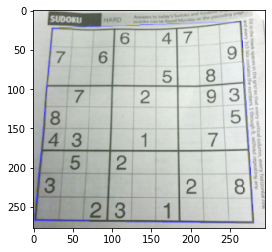

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

imim = imread("https://raw.githubusercontent.com/cvrg-iyte/cvrg-iyte.github.io/master/assets/img/image3.png")
plt.imshow(imim, cmap="gray")


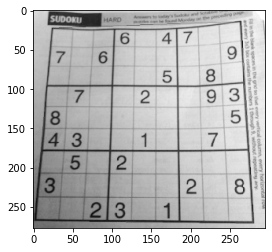

In [39]:

image = rgb2gray(imim)

image*=255
image = image.astype(np.uint8)

plt.imshow(image, cmap="gray")


In [40]:
def global_thresholding(image):
    
    trashH = np.mean(image)
    print("first trash: ",trashH)
    
    while True:
        first_group = []
        second_group = []
        
        for x in image.flatten():
            if x <= trashH:
                first_group.append(x)
            else:
                second_group.append(x)
        
        first_group_mean = np.mean(first_group) if len(first_group) > 0 else 0
        second_group_mean = np.mean(second_group) if len(second_group) > 0 else 0

        new_trashH = (first_group_mean + second_group_mean) / 2
        print("old T: ",trashH)
        print("new T: ",new_trashH)
        
        # Eşikleme durumu kontrolü
        if abs(trashH - new_trashH) < 0.0000001:
            break
        
        trashH = new_trashH
    return trashH

threshold = global_thresholding(image)
print("Threshold: ", threshold)

global_binary = image > threshold


first trash:  193.17187786820045
old T:  193.17187786820045
new T:  186.97345537794772
old T:  186.97345537794772
new T:  181.52728386455226
old T:  181.52728386455226
new T:  177.98728717671116
old T:  177.98728717671116
new T:  175.22887235532664
old T:  175.22887235532664
new T:  174.1594656975974
old T:  174.1594656975974
new T:  173.5047535146669
old T:  173.5047535146669
new T:  173.26769747559626
old T:  173.26769747559626
new T:  173.26769747559626
Threshold:  173.26769747559626


In [41]:
threshold_skimage = threshold_otsu(image)
otsu_binary = image > threshold_skimage

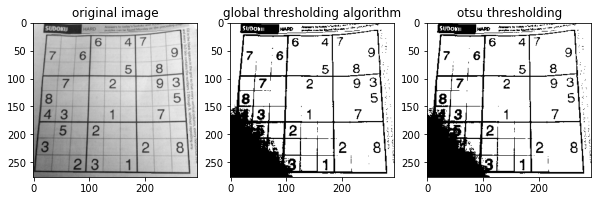

In [42]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].set_title("original image")
ax[0].imshow(image, cmap="gray")

ax[1].set_title("global thresholding algorithm")
ax[1].imshow(global_binary, cmap="gray")

ax[2].set_title("otsu thresholding")
ax[2].imshow(otsu_binary, cmap="gray")


- When looking at the output images, there is no noticeable difference between the results. However, Otsu's method determines a more optimal threshold by considering the histogram structure, while the global thresholding algorithm uses a simpler iterative approach, which may leave slight noise in the background.